In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Quick EDA

In [2]:
codenrock_df = pd.read_csv(Path('../data/raw/codenrock_df.csv'))
rucode_df = pd.read_csv(Path('../data/raw/rucode_df.csv'))

In [3]:
codenrock_df.sample(5)

q_title   
3945        Intuition for perceptron weight update rule  \
380   Как перестать выстраивать логическую и идеальн...   
900         Что нужно изучать начинающему программисту?   
646   Повсюду говорят о параметрической архитектуре....   
4630           В чём разница между навыком и привычкой?   

                                      q_id      label   
3945  b9152b44-8743-4972-9125-04ae98b05c99  ai_answer  \
380   f98f076b-6f70-44a2-832a-b69ed1ef3cae  ai_answer   
900   f013dac9-1d92-4c6f-a2a8-eb430b544cde  hu_answer   
646   f4cc1e9a-438e-4c75-ba31-1e1fc4ebd845  ai_answer   
4630  ab272af8-86bf-4ca6-9b4d-3c107469e9be  hu_answer   

                                               ans_text   
3945  The perceptron weight update rule is a fundame...  \
380   Что за бредовый вопрос?! Зачем вообще нужно пе...   
900   В первую очередь начинающему программисту нужн...   
646   Приветствую! \n\nПараметрическая архитектура -...   
4630  В способах их формирования.\nПривычка – это ав...   

                                   line_id  
3945  ce84fd79-9b74-4c9c-8b64-5c6f72f0a9a8  
380   825c2103-0aa3-4a30-9ed9-6479298826c2  
900   a2e17e3c-92a3-4aef-85e6-2ff19f492f90  
646   94cf9442-eeb3-4b64-8a33-a96dd47c6720  
4630  a6379fa8-6d7e-4f05-b7e3-c33c8555793b

In [4]:
rucode_df.sample(5)

context   
3875  **Вы:** Понятно) Я люблю танцевать, даже очень...  \
3420  **Вы:** Готовить люблю.\r\nА у тебя? Чем увлек...   
3350  **Вы:** Прикольно)).\n\n**Собеседник:** Ты на ...   
2117  **Вы:** Я хотела быть учителем.\n\n**Собеседни...   
5082  **Вы:** Мы с ней мечтаем увитеть весь мир.\nА ...   

                                                 answer   label  
3875  Фильмы смотрю. А ты чем занимаешься помимо тан...  people  
3420  Не все медработники такие, по моему личному оп...  people  
3350                            а хотелось бы научиться  people  
2117  Как здорово, что ты смогла осуществить свою ме...      ai  
5082  Горы - это красиво и впечатляюще! Я люблю путе...      ai

In [5]:
codenrock_df.loc[4166, 'ans_text']

'Знаковое место- место особо важное.\nДля меня, жителя Санкт-Петербурга - это Нарвская площадь. \nЗнаковым это место стало  в 2016 году, когда решив сделать из своего хобби профессию, я пошла на курсы экскурсоводов. \nВ рамках обучения по теме «Образцовая дорога в Петергоф», разбирая маршрут следования, мы добрались до Нарвской площади. \nА надо сказать, что наш педагог Леонид Суханов, постоянно интересовался у нас, «студентов», что мы сами знаем о том или ином месте города.\n\nЯ воспряла  духом, ведь на Нарвской площади я 10 лет ждала автобус, пока училась в школе! \nИ любовалась Нарвскими воротами и ходила за подарками в Кировский универмаг. \n\nНо я и представить не могла, что в этих воротах  расположен музей, а универмаг - это бывшая самая первая «фабрика-кухня», которая появилась после революции и где готовили еду, вторя лозунгу «долой кухонное рабство» для рабочих и студентов всего Петрограда. \nА розовые дома, где жили мои одноклассники, оказались первым жилым комплексом советск

В ответах людей часто встречаются символы переноса строки, в ответах ИИ такого нет. В связи с этим при обработке надо будет их заменять на пробелы.

In [6]:
codenrock_df['ans_text'] = codenrock_df['ans_text'].str.replace('\n', ' ')
rucode_df['answer'] = rucode_df['answer'].str.replace('\n', ' ')

### Баланс классов

label
ai_answer    0.503216
hu_answer    0.496784
Name: proportion, dtype: float64


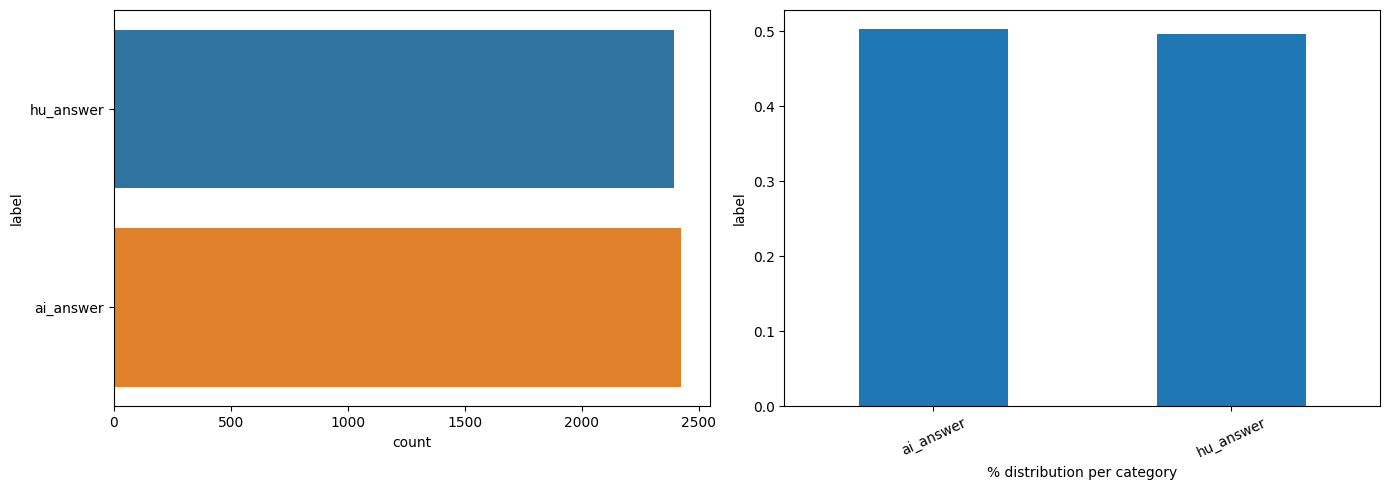

In [7]:
stats_target = codenrock_df['label'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=codenrock_df,y='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('label')
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

label
people    0.507722
ai        0.492278
Name: proportion, dtype: float64


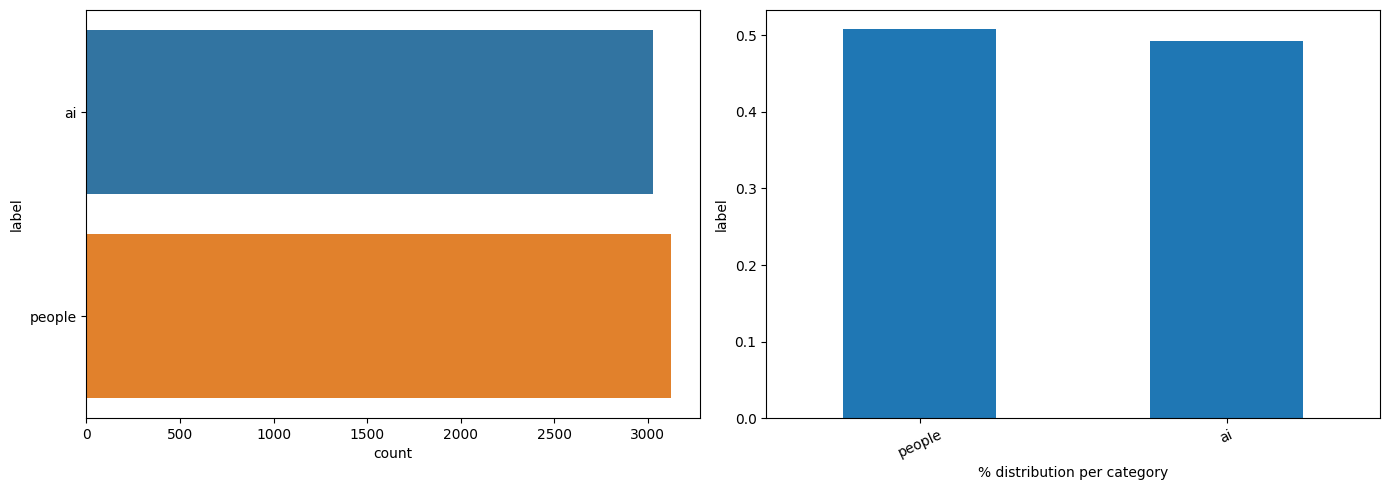

In [8]:
stats_target = rucode_df['label'].value_counts(normalize=True)
print(stats_target)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=rucode_df,y='label')
plt.subplot(1,2,2)
stats_target.plot.bar(rot=25)
plt.ylabel('label')
plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

Оба датасета сбалансированы

### Длина текстов

In [9]:
def answer_length(ans_text):
    return len(ans_text.split())

codenrock_df['answer_length'] = codenrock_df['ans_text'].apply(answer_length)
rucode_df['answer_length'] = rucode_df['answer'].apply(answer_length)

In [10]:
codenrock_df.sample(5)

q_title   
564   Why binary_crossentropy and categorical_crosse...  \
2624  Почему при общении на площадке люди хамят друг...   
1459  Как мы применяем философию в реальной жизни? Я...   
1394  Algorithm to calculate the number of divisors ...   
3058  Какая книга из жанра научно-популярной литерат...   

                                      q_id      label   
564   f5fc52c0-46d6-4f79-8ca4-341950a0cd5a  hu_answer  \
2624  d1d1d73d-103a-46ba-b052-aeceee20dd8b  ai_answer   
1459  e6256b45-531a-4ca2-b4dc-f479ee443f82  hu_answer   
1394  e7155409-3335-4c48-a0e0-8b0c7512055f  ai_answer   
3058  ca6a7bee-269a-4bc9-b063-41e26cade5d9  hu_answer   

                                               ans_text   
564   The reason for this apparent performance discr...  \
2624  Здравствуйте! Спасибо за интересный вопрос. Я ...   
1459  Я не философ, только христианин, и поэтому поз...   
1394  To calculate the number of divisors of a given...   
3058  Старые уже книги А. Беляева "Голова профессора...   

                                   line_id  answer_length  
564   b16aff99-1379-4c3b-b4e1-71ca363b4068            457  
2624  3876c517-0130-4310-b454-c8328813ca2f             90  
1459  8f8b9a1c-95b1-4e17-982a-fbae14509832            112  
1394  534e52c0-8c6a-429b-a7e6-2acfa693c28c            135  
3058  fe79b9e8-8200-420d-b302-2d7d6c277b92             33

In [11]:
rucode_df.sample(5)

context   
1076  **Вы:** рецептик, сейчас скину.\nРасскажи пока...  \
57    **Вы:** Один покоряешь ?) или с семьёй) Да, ри...   
5908  **Вы:** Ммм.\nА у тебя есть домашние животные?...   
276   **Вы:** Французское вино это волшебно)).\nОсоб...   
5975  **Вы:** Роберт.\n\n**Собеседник:** А я не ем р...   

                                                 answer   label  answer_length  
1076  Понятно, каждый имеет свои страхи. А у меня ко...      ai             24  
57                                      не котейко есть  people              3  
5908  Одна - кот, а еще одна - кошка. Так, что у теб...      ai             14  
276           Да, камин создает такую уютную атмосферу.      ai              6  
5975                                         Ага. А ты?  people              3

C:\Users\-\AppData\Local\Temp\ipykernel_1984\1862719001.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(codenrock_df['answer_length'],color='g',shade=True)


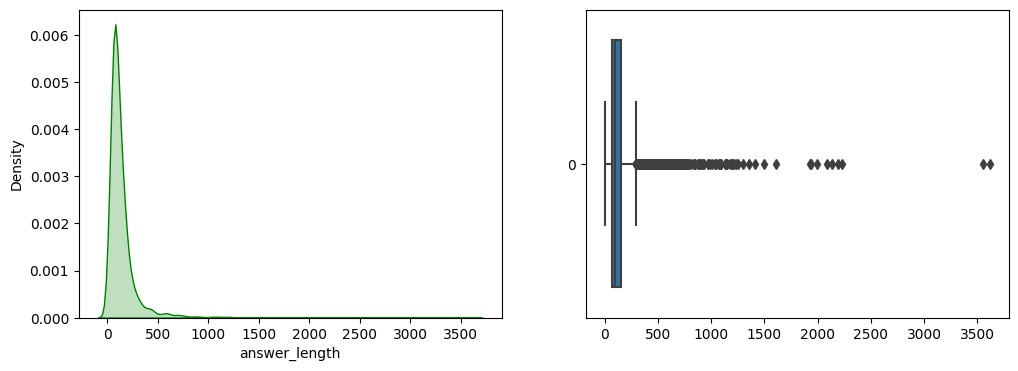

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(codenrock_df['answer_length'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(codenrock_df['answer_length'], orient='h')
plt.show()

C:\Users\-\AppData\Local\Temp\ipykernel_1984\2040147267.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rucode_df['answer_length'],color='g',shade=True)


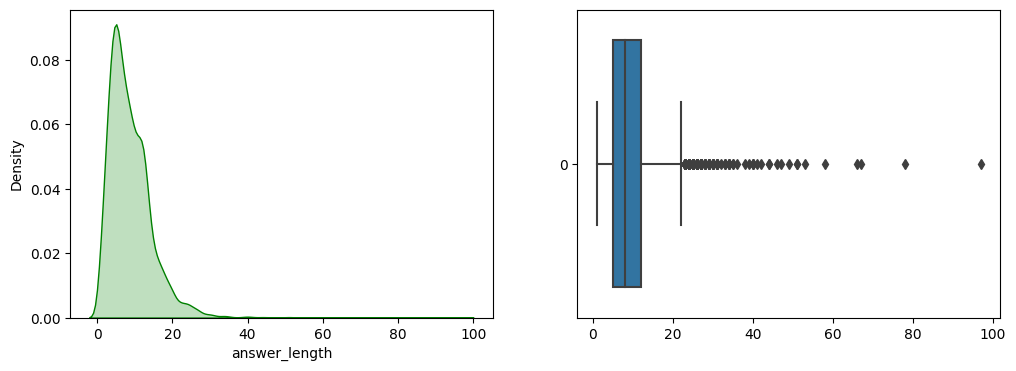

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(rucode_df['answer_length'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(rucode_df['answer_length'], orient='h')
plt.show()

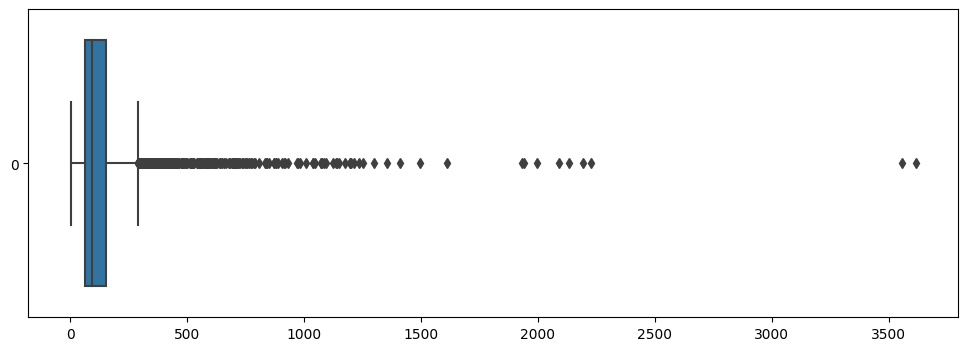

In [14]:
plt.figure(figsize=(12,4))
sns.boxplot(codenrock_df['answer_length'], orient='h')
plt.show()

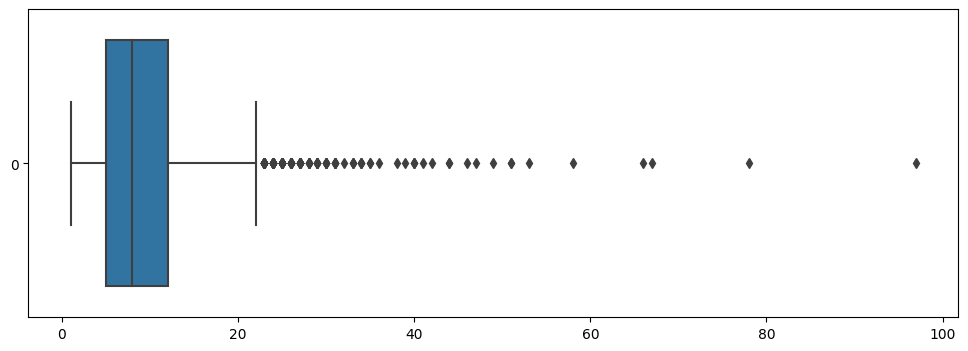

In [15]:
plt.figure(figsize=(12,4))
sns.boxplot(rucode_df['answer_length'], orient='h')
plt.show()

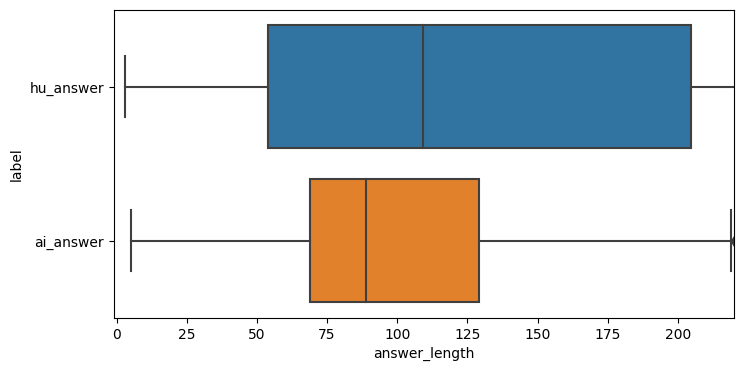

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data=codenrock_df, x='answer_length', y='label').set_xlim(-1, 220)
plt.show()

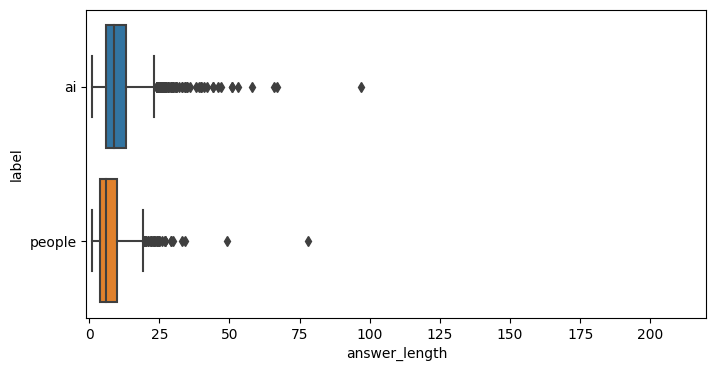

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(data=rucode_df, x='answer_length', y='label').set_xlim(-1, 220)
plt.show()

In [18]:
codenrock_df.groupby(['label'])['answer_length'].median()

label
ai_answer     89.0
hu_answer    109.0
Name: answer_length, dtype: float64

In [19]:
rucode_df.groupby(['label'])['answer_length'].median()

label
ai        9.0
people    6.0
Name: answer_length, dtype: float64

Как мы видим, в датасете rucode тексты значительно короче. Кроме того, ответы ИИ даже немного длиннее человеческих.

# Outliers

In [20]:
codenrock_df_outliers = codenrock_df[abs(zscore(codenrock_df['answer_length'])) >= 3 ]
codenrock_df_outliers

q_title   
84          Efficiency of purely functional programming  \
153   Build fat static library (device + simulator) ...   
165   В чем заключается принципиальное отличие миров...   
238          Каким образом избежать SQL-инъекций в PHP?   
254   Finding K-nearest neighbors and its implementa...   
...                                                 ...   
4335         How does the Import Library work? Details?   
4435      Drawing UIBezierPath on code generated UIView   
4439  Differences between Git-scm, msysGit & Git for...   
4653  Отвечает ли строитель на стройке за качество п...   
4671  How to get the system uptime in Windows? [closed]   

                                      q_id      label   
84    fedada25-c5d4-4266-999e-51d21c4f2f5b  hu_answer  \
153   fd6ccd20-f80a-4822-9261-2130d136f437  hu_answer   
165   fd0c979d-cb73-4f6a-9fe6-34559afceae2  hu_answer   
238   fbd86897-c94e-4c66-97bf-e029dd4c18aa  hu_answer   
254   fba01066-8ce5-4a0c-b176-08354fc8bf86  hu_answer   
...                                    ...        ...   
4335  b15e69f1-138b-4dc6-8981-61cc6a52878c  hu_answer   
4435  af81e32a-671b-43fa-a74f-18120a037cf4  hu_answer   
4439  af7c4426-a8c7-44e6-b3fb-abb292910b56  hu_answer   
4653  aaa4140a-7835-4efb-aba7-2a378dda078e  hu_answer   
4671  aa5d0214-f02e-4833-94ad-2298aaff66be  hu_answer   

                                               ans_text   
84    According to Pippenger [1996] , when comparing...  \
153   ALTERNATIVES: Easy copy/paste of latest versio...   
165   Термин "шестидесятники" в равной степени может...   
238   Принцип изложенный ниже есть общая директива н...   
254   The basis of the K-Nearest Neighbour (KNN) alg...   
...                                                 ...   
4335  Linking to a DLL file can occur implicitly at ...   
4435  It wasn't long ago that I didn't even know how...   
4439  The website git-scm.com is the official websit...   
4653  Вопрос необходимо уточнить.  О ком идет речь -...   
4671  Following are eight ways to find the Uptime in...   

                                   line_id  answer_length  
84    ab3364a4-25e4-4cd9-a5e8-a98a36cd3183            699  
153   ffda528e-338f-41ab-b522-eea98775c7b4           1235  
165   0c014203-b381-44b9-80a0-d412cebfd0bb           1074  
238   f35806f0-a191-4118-ad46-67bbe81e8849            697  
254   7d1c8084-7d8f-4a5e-96c7-a36a1aad7085           2192  
...                                    ...            ...  
4335  c3aa63d0-ccbb-422b-be6e-1fe78b6b9972           1125  
4435  1cbc00c3-9b88-4b3d-9fcb-01727057c054           1038  
4439  9af383b3-c67d-46e5-8221-0b635a7b273f            756  
4653  84c5f257-41fe-4f55-8a98-20ec4391ce5b           1199  
4671  3bb54a4f-0583-4a9e-84b3-c39ec616de54            985  

[83 rows x 6 columns]

In [21]:
rucode_df_outliers = rucode_df[abs(zscore(rucode_df['answer_length'])) >= 3 ]
rucode_df_outliers

context   
0     **Вы:** Спасибо большое)).\nКакую музыку слуша...  \
35    **Вы:** прикольно.\nу тебя есть мечта?\n\n**Со...   
83    **Вы:** Что ты любишь? О чём мечтаешь?\nНу мне...   
126   **Вы:** Я работаю фельдшеров в селе, сейчас на...   
314   **Вы:** Это здорово) Я тоже не верил, что науч...   
...                                                 ...   
5951  **Вы:** Да, люблю Я сижу дома и работаю во фри...   
5995  **Вы:** Тортики.\n\n**Собеседник:** А я тирами...   
6074  **Вы:** Слушаю Рок! Это мой любимый жанр! А ты...   
6081  **Вы:** Спасибо. А долго тебе на повара учитьс...   
6119  **Вы:** ище не решила)но хотелось бы вольво.\n...   

                                                 answer   label  answer_length  
0     Ой, ну тогда давай я тебе порекомендую что-ниб...      ai             53  
35    Конечно, у меня есть мечты! Я мечтаю о мире бе...      ai             33  
83    Вау, звучит круто! Я тоже обожаю море и всё, ч...      ai             47  
126   Да, работа в медицине - это не просто професси...      ai             28  
314   А мне пришлось учиться в институте. Как только...      ai             67  
...                                                 ...     ...            ...  
5951  Не правда. Питер не жёлтый и не мрачный, иногд...  people             78  
5995  Ой, а я думала, что у тебя уже есть маленькие ...      ai             36  
6074  Я живу в России, но любимого цвета у меня нет....      ai             27  
6081  Ну, конечно, теория тоже важна, но у нас в уче...      ai             51  
6119  Ну, тогда я бы посоветовал посмотреть на Toyot...      ai             27  

[72 rows x 4 columns]

label
hu_answer    1.0
Name: proportion, dtype: float64


<Axes: xlabel='label'>

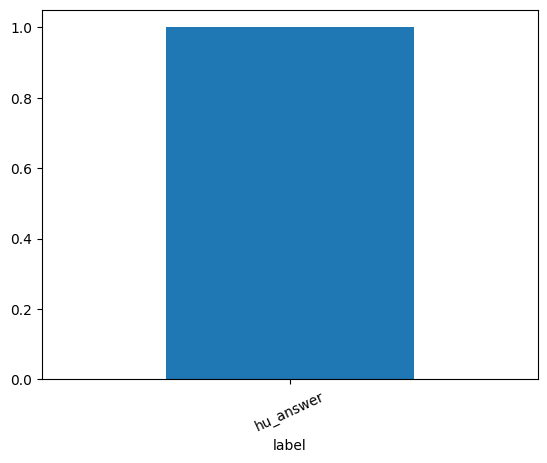

In [22]:
stats_long_text = codenrock_df_outliers['label'].value_counts(normalize=True)
print(stats_long_text)
stats_long_text.plot.bar(rot=25)

В датасете codenrock очевидно собраны данные на более длинных ответах, и здесь люди писали гораздо более длинные тексты

label
ai        0.861111
people    0.138889
Name: proportion, dtype: float64


<Axes: xlabel='label'>

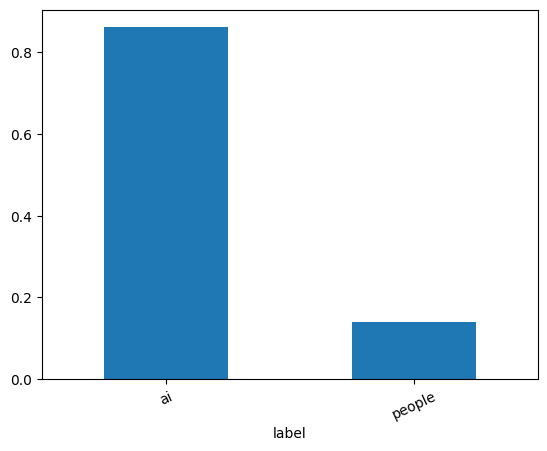

In [23]:
stats_long_text = rucode_df_outliers['label'].value_counts(normalize=True)
print(stats_long_text)
stats_long_text.plot.bar(rot=25)

В коротких ответах из датасета rucode ситуация иная: люди могут писать более короткие ответы, поэтому в качестве выбросов выделилось больше ответов ИИ, чем людских